# Project Overview

This project focuses on developing a predictive model to identify customers at high risk of discontinuing SyriaTel’s telecommunications services (churn) and switching to other providers. Using a binary classification approach, the model will analyze historical customer behavior data to assess churn likelihood. The insights generated will help SyriaTel implement proactive, data-driven retention strategies, strengthen customer loyalty, and address churn challenges effectively.

# Business Understanding

SyriaTel aims to enhance customer retention by identifying at-risk customers through a predictive model. Leveraging historical data, the initiative seeks to uncover actionable insights, enabling efficient resource allocation, reducing churn-related revenue loss, and improving customer experiences. This data-driven approach strengthens SyriaTel’s competitiveness in the telecom market.

- Problem Statement -: SyriaTel aims to enhance customer retention by identifying at-risk customers through a predictive model. Leveraging historical data, the initiative seeks to uncover actionable insights, enabling efficient resource allocation, reducing churn-related revenue loss, and improving customer experiences. This data-driven approach strengthens SyriaTel’s competitiveness in the telecom market.

# Data Understanding

The dataset, sourced from Kaggle, contains 3,333 records and 21 features representing customer behavior and service usage. It includes 8 integer, 8 float, 4 object, and 1 boolean columns. The target variable, Churn, indicates whether a customer has terminated their service. Key features include account duration, usage metrics across different times of the day, subscription details, and customer interactions with support services. This diverse dataset provides a comprehensive foundation for predicting churn and analyzing its drivers.

## Objectives
#### Primary objective
- Develop a predictive model solution to proactively mitigate customer churn and safeguard revenue.
#### Ancillary objectives:
- Conduct a comprehensive feature analysis to identify actionable insights into the key drivers of customer churn
- Evaluate the impact of customer service on customer churn.
- Analyze customer behavior patterns to inform the development of strategies for reducing churn



## Metrics of Success:
The performance of SyriaTel’s churn prediction model will be assessed using the following key metrics based on benchmarks from research studies and the telecommunications industry:
- __Accuracy: (80% - 90%)__ indicating the proportion of correct predictions made by the model.
- __Precision:(70% - 90%)__ reflecting the model's ability to correctly identify actual churners among those predicted to churn.
- __Recall: (60% - 85%)__ measuring the model's effectiveness in identifying all actual churn cases.
- __F1 Score:( 65%–87%)__ Balances precision and recall, providing a single metric for model performance.



### Importing the Relevant Libraries
Importing essential libraries for numerical operations (NumPy), data manipulation (Pandas), data visualization (Matplotlib and Seaborn), and machine learning (Scikit-learn). Additionally, configuring notebook aesthetics ensures that visualizations are clear and easily interpretable.


In [1]:
# Importing the necessary libraries

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 


# Modeling
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score  
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
)  # Performance evaluation metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier

# Statsmodels
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the data

I have already created a python file my working directory which contain different classes I will be using in this project.

In [2]:
# Load the dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# calling the classes for data exploring and cleaning
from project_functions import DataInspector,DataCleaner

#Instanciating DataInspector with the dataset
inspector = DataInspector(df)

print("\n--- First Five Rows ---")
inspector.first_five_rows()

print("\n--- Data Description ---")
inspector.describe_data()

print("\n--- Dimensionality Check ---")
inspector.check_dimensionality()

print("\n--- DataFrame Information ---")
inspector.display_info()



--- First Five Rows ---
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge

##  Data cleaning and Handling of of missing valaues and duplicates

In [3]:
cleaner = DataCleaner(df)  # Instantiate the class with the DataFrame

# Check for missing values
print("\nChecking Missing Values:")
cleaner.check_missing_values()

# Check for duplicate rows
print("\nChecking for Duplicates:")
cleaner.check_duplicates()


Checking Missing Values:

Missing Values in Each Column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Checking for Duplicates:

Number of Duplicate Rows: 0


### Exploratory Data Analysis (EDA)

In [4]:
# Columns to drop
columns_to_drop = ["state",  "phone number"]

# Drop the columns
df_relevant = df.drop(columns=columns_to_drop, axis=1)

# Print the shape to verify
print("Original DataFrame shape:", df.shape)
print("New DataFrame shape after dropping columns:", df_relevant.shape)

Original DataFrame shape: (3333, 21)
New DataFrame shape after dropping columns: (3333, 19)


I decided to remove the "state" column from my analysis as I believe it is sufficiently represented by the area code feature. Additionally, since the phone number serves as a unique identifier for the customer, it does not contribute significant value to the analysis.

In [5]:
# Make a copy of cleaned data 
df_cleaned = df_relevant.copy()
df_1 = df_cleaned

In [6]:
# Identify the numeric variables
numerical_df = df_1.select_dtypes("number")
# Removing the area code from the numerical dataframe it was recognized as numerical but it actually categorical
numerical_df = numerical_df.drop(columns = ["area code"], axis= 1) 
numerical_df

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [7]:
# Categorical Variables
cat_df = df_1[["international plan", "voice mail plan", "area code"]]
cat_df 

,international plan,voice mail plan,area code
0,no,yes,415
1,no,yes,415
2,no,no,415
3,yes,no,408
4,yes,no,415
...,...,...,...
3328,no,yes,415
3329,no,no,415
3330,no,no,510
3331,yes,no,510


The purpose of identifying the categorical variables and numerical variables is help me to determine the appropriate statistical techniques and visualizations to use for analyzing each type of data.

#### Univariate Analysis

The goal here is to clearly visualize the data distribution, making it easier to identify its shape, spread, central tendency, and any outliers or patterns that may not be immediately apparent.

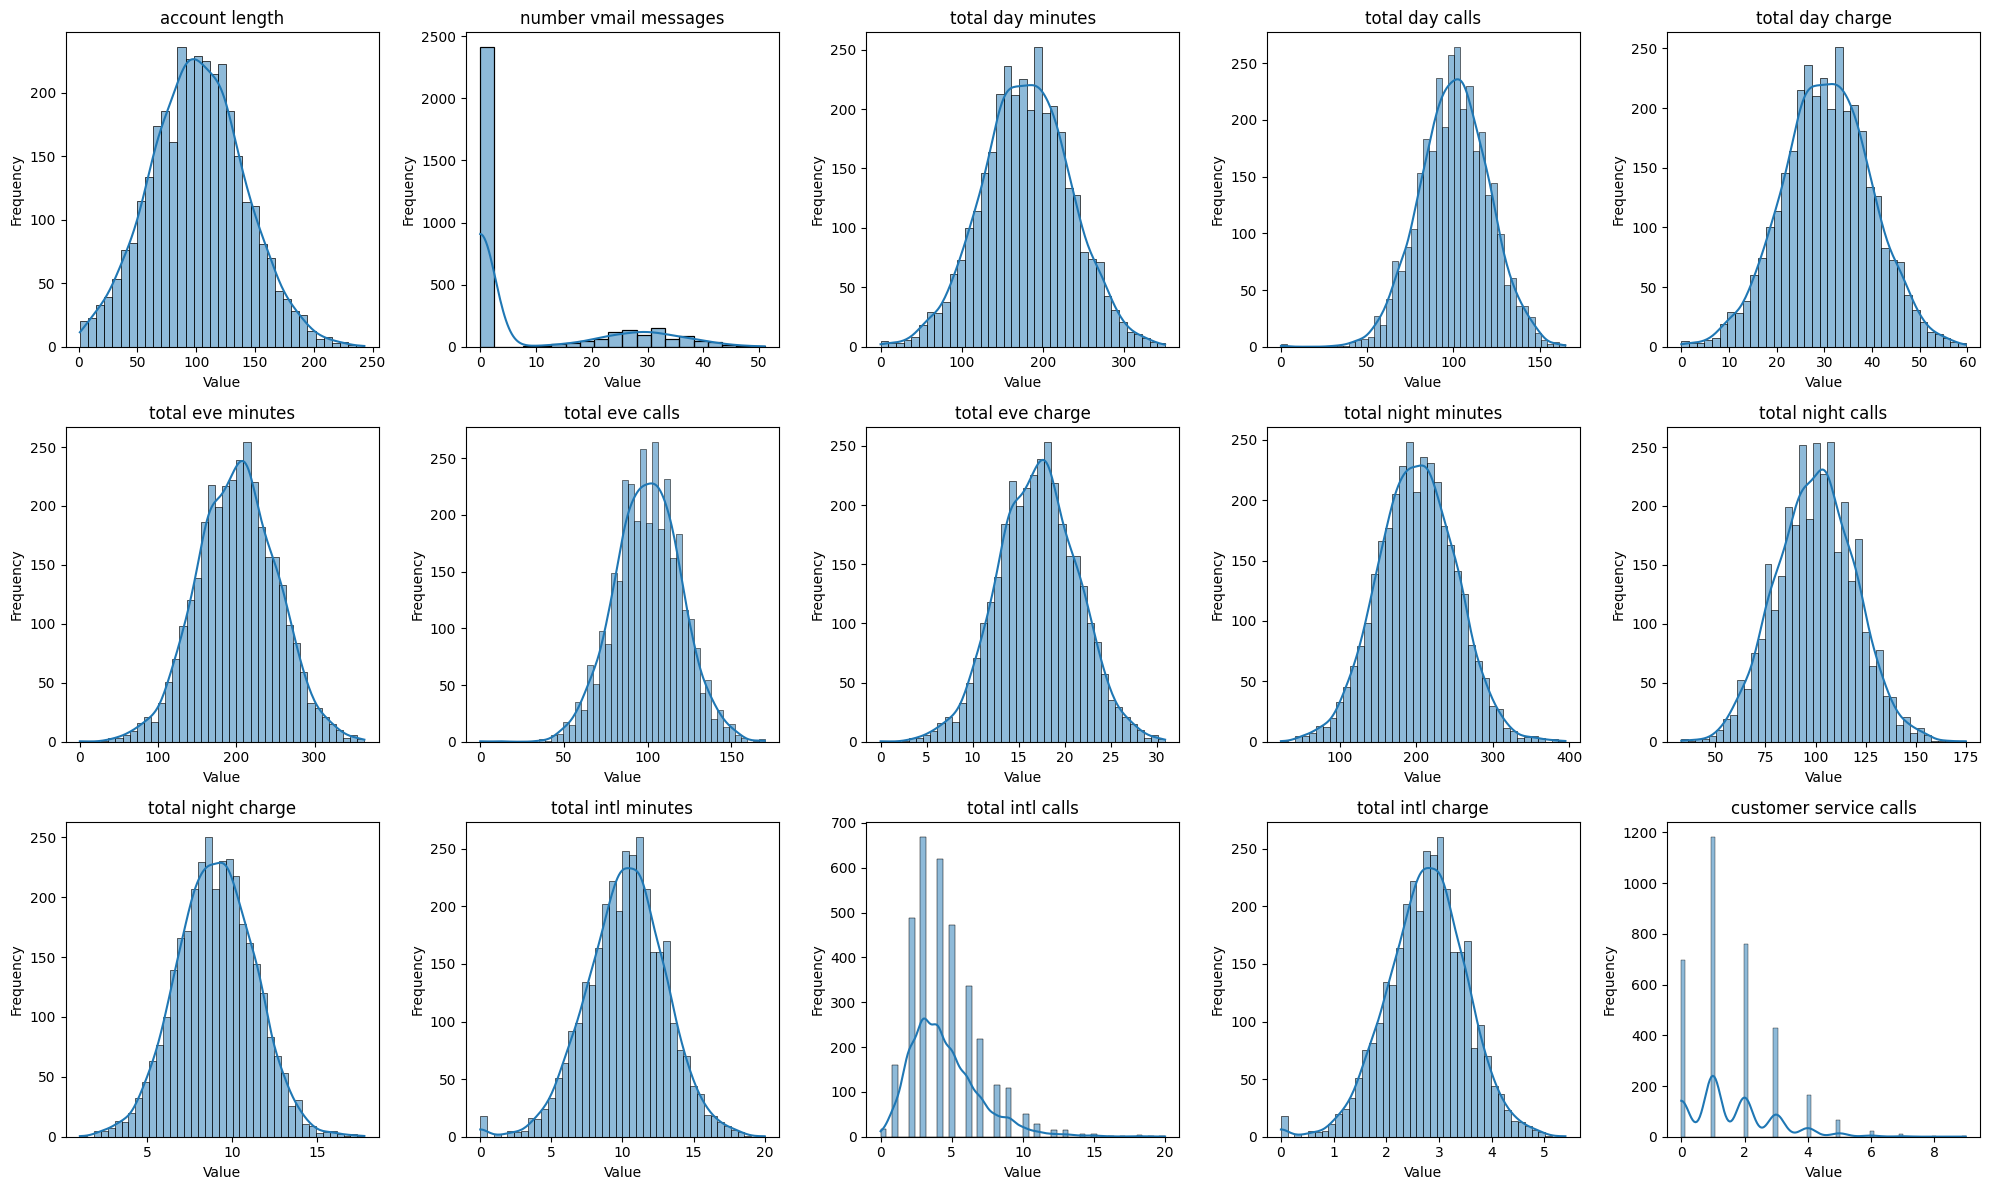

In [8]:
# Plot histograms for Numerical Variables
# There is UnivariateAnalysis  class I created already so its just importing it
from project_functions import UnivariateAnalysis


# Instantiate the class
analysis = UnivariateAnalysis(numerical_df=numerical_df, cat_df=cat_df) 

# Plot histograms
analysis.plot_numerical_histograms() 


- The distribution plots indicate that all features, except for customer service calls, and the number of voicemail messages, follow a normal distribution. The total number of international calls exhibits a slight right skew but remains approximately normal. The number of voicemail messages displays a pronounced peak on the right, suggesting the presence of outliers. Customer service calls exhibit multiple peaks, indicating a multimodal pattern, consistent with its nature as an integer rather than a continuous variable.


In [9]:
# confirming that area code is categorical
df_1["area code"].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [10]:
# checking the number of unique elements in the columns
df_1.nunique()

account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

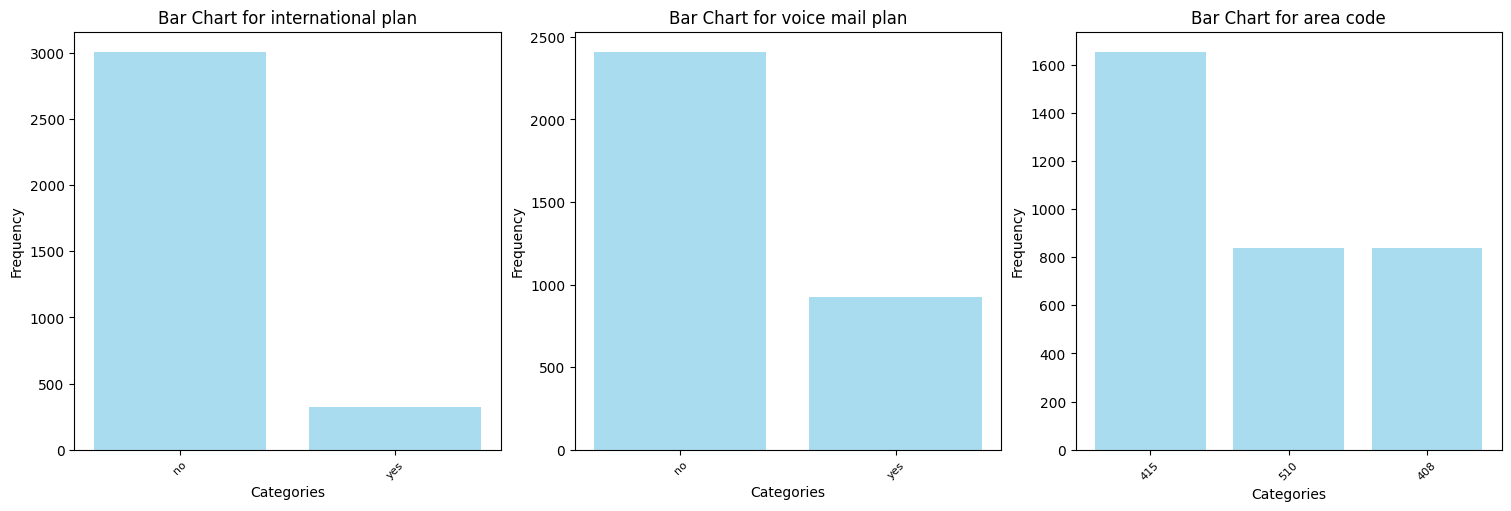

In [11]:
# Plot Categorical Histograms
analysis.plot_categorical_histograms()

##### Analysis on 'churn' variable (Target feature)
The feature is of boolean data type, and the analysis is centered around this characteristic. "Churn" indicates that the customer has discontinued using Syria's services and has probably moved to a competitor. 
True signifies that the customer has already left, while False denotes that they remain an active account holder.

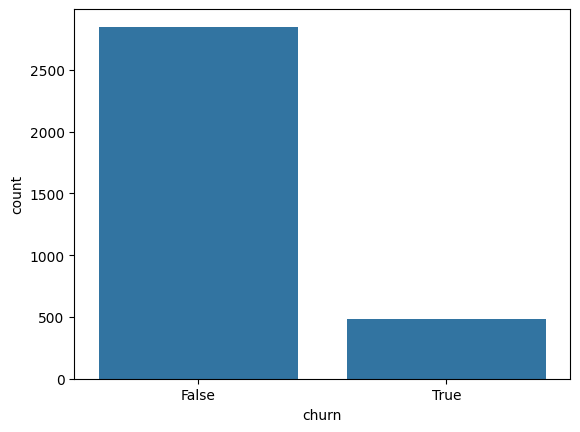

churn
False    2850
True      483
Name: count, dtype: int64


In [12]:
# Countplot of the churn feature
sns.countplot(x='churn', data=df_1) 
plt.show()
print(df_1.churn.value_counts())

Churn Rate= (483/3333) * 100 = 14.49%
Syria Tel has already lost close to 14.5% of the customers.

### Bivariate Analysis

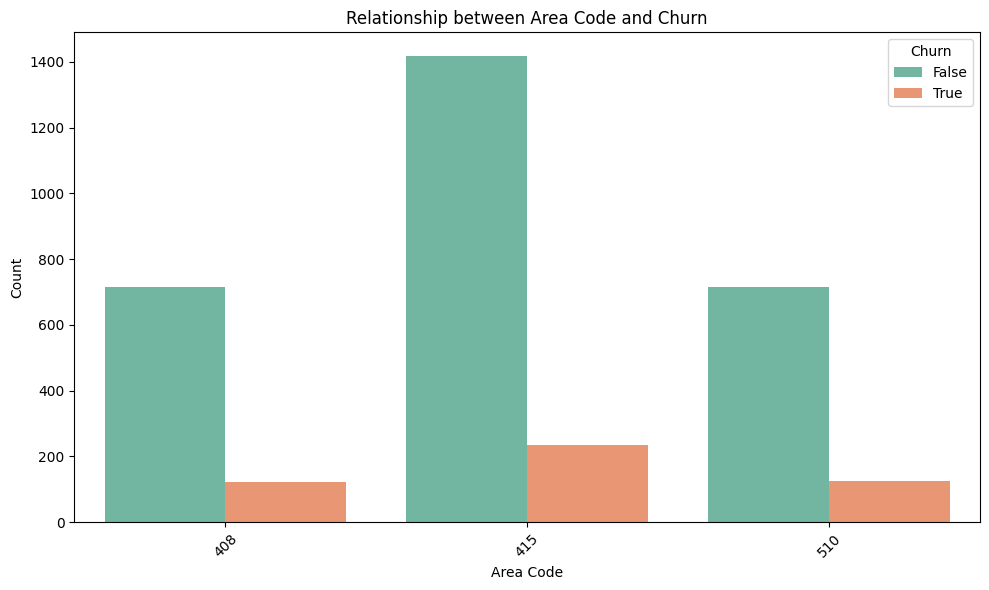

In [13]:
# Relation between Area code and churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x="area code", hue="churn", palette= "Set2")
plt.title("Relationship between Area Code and Churn")
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc="best")
plt.tight_layout()
plt.show()


Area codes 408 and 510 show similar churn rates and active customer counts for Syria Tel. In contrast, area code 415 has a higher number of active customers and slightly more churned customers, indicating a larger overall customer base in that region.

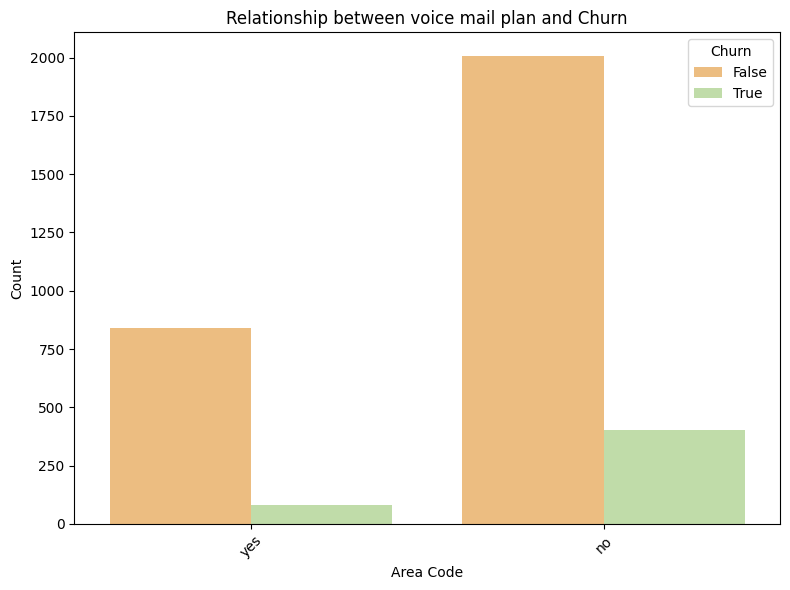

In [14]:
# Relation between voice mail plan and churn
# Setting figure size
plt.figure(figsize=(8, 6))

sns.countplot(data=df_1, x="voice mail plan", hue="churn", palette="Spectral")
plt.title("Relationship between voice mail plan and Churn")
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc="best")
plt.tight_layout()
plt.show()


Customers with a voice mail plan have a lower churn rate, indicating it may enhance retention. However, most non-churning customers do not have a voice mail plan, suggesting it appeals to a specific segment rather than the broader customer base.

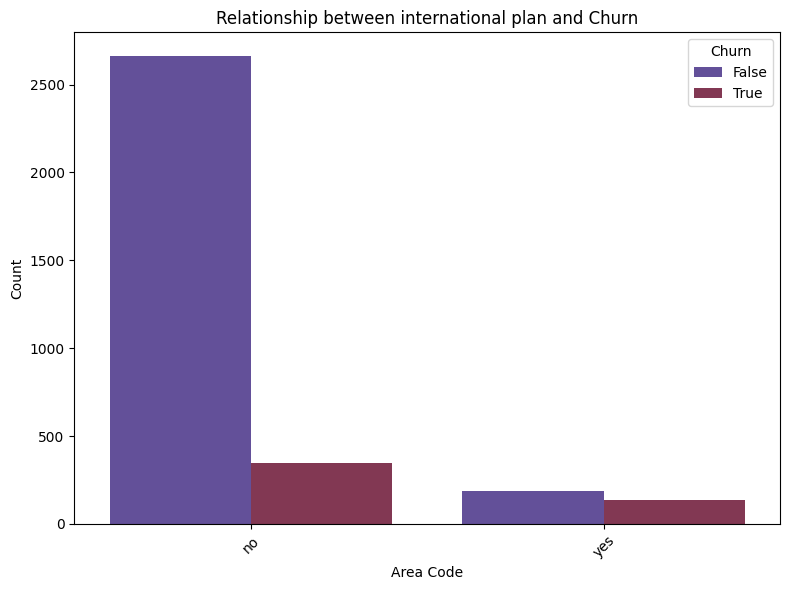

In [15]:
# Relationship between voice mail plan and churn

plt.figure(figsize=(8, 6))
sns.countplot(data=df_1, x="international plan", hue="churn", palette="twilight")
plt.title("Relationship between international plan and Churn")
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc="best")
plt.tight_layout()
plt.show()

International plan subscribers are fewer compared to non-subscribers and have a lower churn rate. However, non-subscribers account for the highest number of customers who have not churned, reflecting their dominance in the customer base.

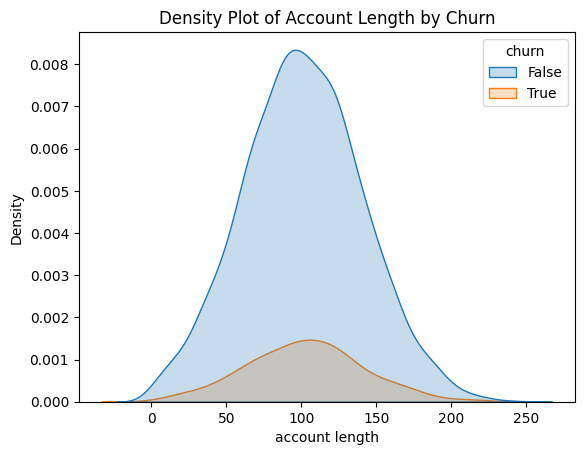

In [16]:
# Bivariate analysis for numerical variables
# Relationship between the Account length and churn
sns.kdeplot(data=df_1, x="account length", hue="churn", fill=True)
plt.title("Density Plot of Account Length by Churn")
plt.show()

The density plot shows significant overlap and similar central tendencies between churn groups, indicating that account length is not a significant predictor of customer churn.


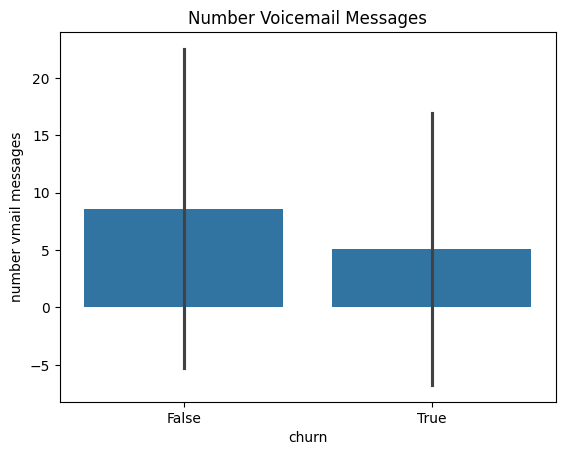

In [17]:
# Relationship between the Number of Voicemail messages and churn
sns.barplot(x="churn", y="number vmail messages", data=df_1, ci="sd")
plt.title("Number Voicemail Messages")
plt.show()

Non-churned customers tend to have higher voicemail usage compared to churned customers, who generally exhibit lower voicemail activity, possibly reflecting reduced engagement.

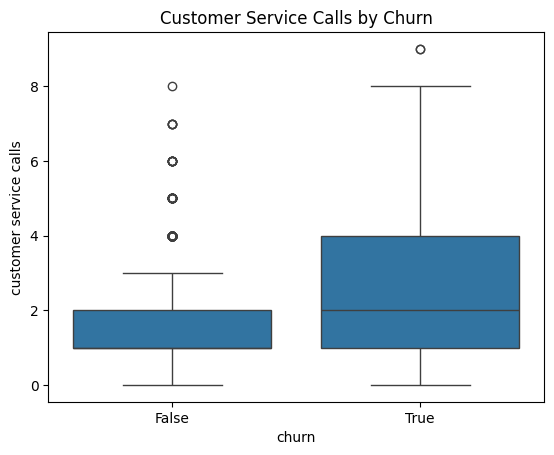

In [18]:
# Relationship between customer service call in regards to churn
sns.boxplot(x="churn", y="customer service calls", data=df_1)
plt.title("Customer Service Calls by Churn")
plt.show()

From the plots there seem to be a clear relationship between the number of customer service calls and the likelihood of churn. Specifically, customers who make more than four calls to customer service show a significantly higher probability of discontinuing their service.

#### Multivariate Analysis


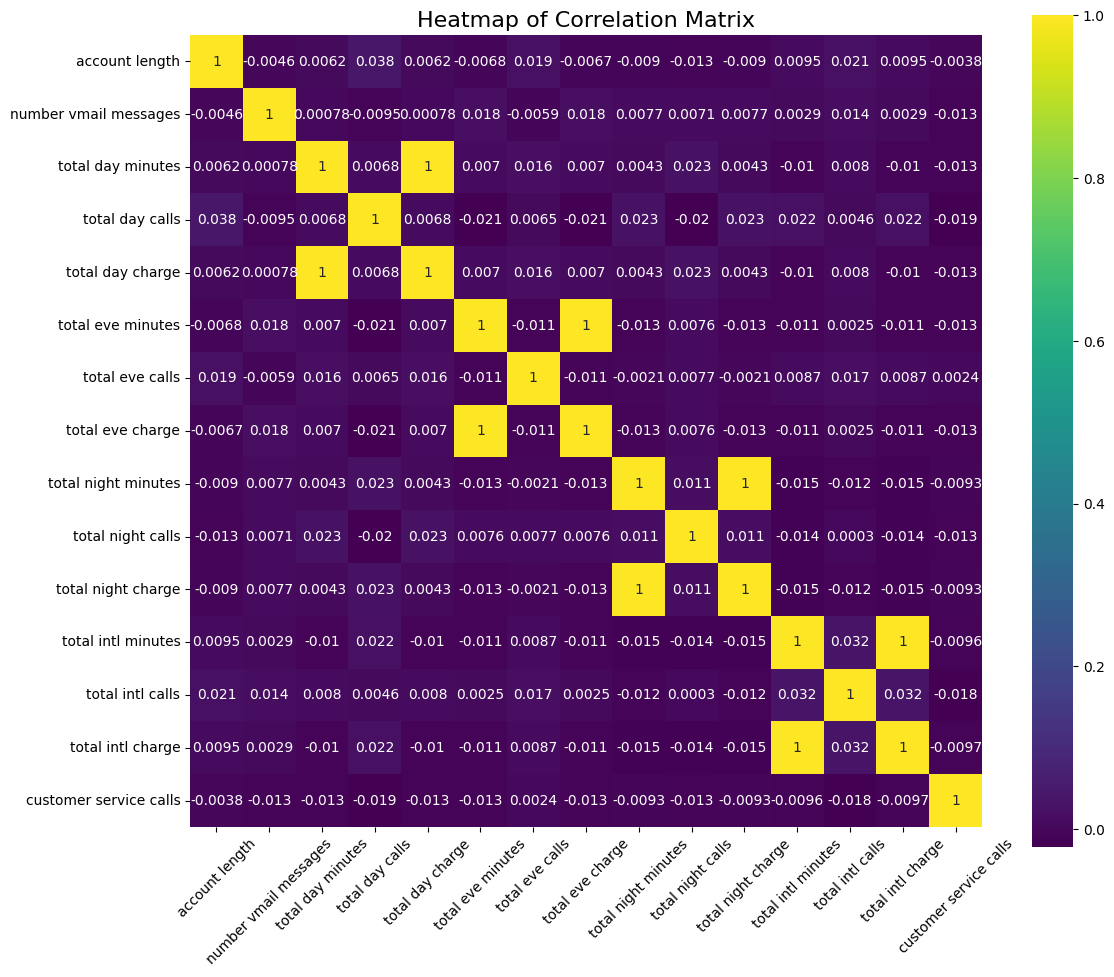

In [19]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", cbar=True, square=True)       

plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()       # Adjust layout to avoid label overlap
plt.show()

The analysis reveals that most features in the dataset exhibit little to no correlation, suggesting that the majority of variables are independent and do not share linear relationships.

__Perfect Positive Correlations__
Several features demonstrate a perfect positive correlation (correlation coefficient of 1), driven by their direct dependence on each other:


__Day Minutes and Day Charges:__ Fully correlated as charges are directly proportional to the minutes used during the day.

__Evening Minutes and Evening Charges:__ Exhibit perfect correlation for the same reason, reflecting the linear dependency between usage and charges.

__Night Minutes and Night Charges:__ Similarly, night usage minutes and charges share a direct linear relationship.

__International Minutes and International Charges:__ This feature pair also shows perfect correlation, following the same pattern of dependency.

__Rationale Behind Perfect Correlations__

The perfect correlations observed are expected and logical because charges are a calculated function of the corresponding minutes used. This dependency results in a straightforward linear relationship with a correlation coefficient of 1.

In [20]:
# copy the dataframe
df2 = df_1.copy()

In [21]:
df_1.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### Handling Outliers

In [22]:
# IQR and filter outliers
def handling_outliers_iqr(numerical_df):
    """
    Removing outliers in a DataFrame using the IQR method for each numerical column.
    """
    # Iterate over numerical columns
    for col in numerical_df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = numerical_df[col].quantile(0.25)  
        Q3 = numerical_df[col].quantile(0.75)  
        IQR = Q3 - Q1                          
        
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        
        numerical_df[col] = numerical_df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return numerical_df  

# calling function
df2_cleaned = handling_outliers_iqr(numerical_df)

print(df2_cleaned.describe())

       account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.003300               8.098710         179.816157   
std         39.644112              13.687436          54.152190   
min          1.000000               0.000000          34.650000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        206.500000              50.000000         325.450000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.473597         30.569292         201.009541       100.134113   
std          19.863740          9.205865          50.401365        19.758567   
min          46.500000          5.890000          63.550000        46.500000

Clip is a precise, non-destructive method to handle outliers by capping values within calculated bounds:

- Preserves Data: Retains all rows, avoiding data loss or bias from removal.
-  Balances Influence: Reduces outlier impact while maintaining feature relationships.
-  Interpretable: Keeps the data on its original scale, unlike complex transformations.
- Efficient and Reproducible: Systematic and computationally fast using IQR-based thresholds.

Ideal for ensuring data integrity and usability without distorting its structure or insights

In [23]:
# converting categorical variables to numericals 
col_to_ohe = ["area code", "international plan", "voice mail plan"]

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop="first")
encoded = ohe.fit_transform(df2[col_to_ohe])

# DataFrame with the new one-hot encoded columns
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(col_to_ohe))

# Concatenate the original DataFrame with the encoded DataFrame
df2 = pd.concat([df2, df_encoded], axis=1)

# Drop the original categorical columns
df3 = df2.drop(columns=col_to_ohe)

df3.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1.0,0.0,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1.0,0.0,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1.0,0.0,1.0,0.0


In [24]:
# Map the 'churn' column in df3
if 'churn' in df3.columns:
    df3['churn'] = df3['churn'].map({False: 0, True: 1})

# Check the result
print(df3['churn'].head())

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64


In [25]:
df4 = df_1.copy()

In [26]:
# Define the categorical columns to one-hot encode
col_to_ohe = ["area code", "international plan", "voice mail plan"]

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop="first")

# transform the specified columns
encoded = ohe.fit_transform(df2[col_to_ohe])

# DataFrame with the new one-hot encoded columns
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(col_to_ohe))

# Concatenate the original DataFrame with the encoded DataFrame
df2 = pd.concat([df2, df_encoded], axis=1)

# Drop the original categorical columns
df3 = df2.drop(columns=col_to_ohe)

df3.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510,international plan_yes,voice mail plan_yes,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Modeling

In [27]:
# Defining the dependent variable y and indepent variable
y = df3["churn"]
X = df3.drop(columns=["churn"], axis=1)


In [28]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

####  Baseline Logistic Model

In [29]:
# Instantiating the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fitting the model to the training data
baseline_model = logreg.fit(X_train, y_train)

# Predicting on the training set
y_pred = logreg.predict(X_train)  # Correct method to predict

# Evaluate the model using classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2141
        True       0.45      0.06      0.11       358

    accuracy                           0.85      2499
   macro avg       0.66      0.53      0.52      2499
weighted avg       0.80      0.85      0.81      2499



The classification report reveals strong performance for class 0(F1-score: 0.92, recall: 0.99) but significantly weaker results for class 1(F1-score: 0.11, recall: 0.06), largely due to class imbalance (2141 vs. 358 instances). While overall accuracy stands at 85%, the minority class performance needs improvement. To address this, I have chosen SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic samples, ensuring better representation of the minority class and enhancing model performance without overfitting.

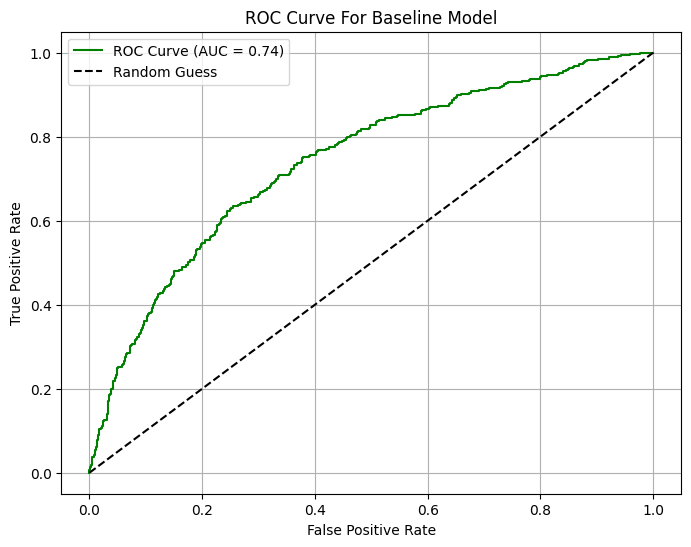

In [30]:
# Roc AUC
y_prob = logreg.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
auc = roc_auc_score(y_train, y_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Baseline Model")
plt.legend()
plt.grid()
plt.show()

The ROC curve (AUC = 0.73) indicates the model has moderate ability to distinguish between classes, with a 73% chance of ranking a positive instance higher than a negative one. However, the low minority class performance highlights the need to address class imbalance to improve overall predictive power.

### Model II
Fine tuning the second Logistic model
I start by handling the classs imbalance using SMOTE technique, Scale the data set and add a few parameters like introducing sublinear, saga solver and regularization

I selected StandardScaler because it works well with models like Logistic Regression and Decision Trees, particularly with features that are predominantly normally distributed. By scaling data based on mean and standard deviation, it ensures consistency while being less affected by outliers compared to MinMaxScaler.

The liblinear solver is ideal for smaller datasets and supports both L1 and L2 regularization, making it a reliable and efficient choice for optimizing Logistic Regression models.

I chose a regularization parameter of 1e12 with the liblinear solver to handle sparse features and large coefficients effectively. This combination ensures robust performance, stability, and efficiency in Logistic Regression, managing feature importance and reducing overfitting.


In [31]:
# Logistic_2
model_name = "Logistic_2"

# Instantiating StandardScaler, SMOTE, LogisticRegression
scaler = StandardScaler()
smote = SMOTE(random_state=42)
logreg = LogisticRegression(solver="liblinear", random_state=42, C=1e12)

# Resample the training data using SMOTE to handle class imbalance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Fit the logistic regression model to the scaled and resampled training data
logreg.fit(X_train_scaled, y_train_resampled)

# Predict on the scaled and resampled training set
y_pred = logreg.predict(X_train_scaled)

# Print the model name and evaluation metrics
print(f"Model Name: {model_name}")
print(classification_report(y_train_resampled, y_pred))

Model Name: Logistic_2
              precision    recall  f1-score   support

       False       0.76      0.76      0.76      2141
        True       0.76      0.76      0.76      2141

    accuracy                           0.76      4282
   macro avg       0.76      0.76      0.76      4282
weighted avg       0.76      0.76      0.76      4282



After addressing class imbalance, adding regularization, and using the liblinear solver, the model achieves balanced performance across both classes (0.0 and 1.0) with precision, recall, and F1-score all at 0.76. The overall accuracy is 76%, with no disparity between the classes. This indicates effective handling of imbalance and improved consistency.

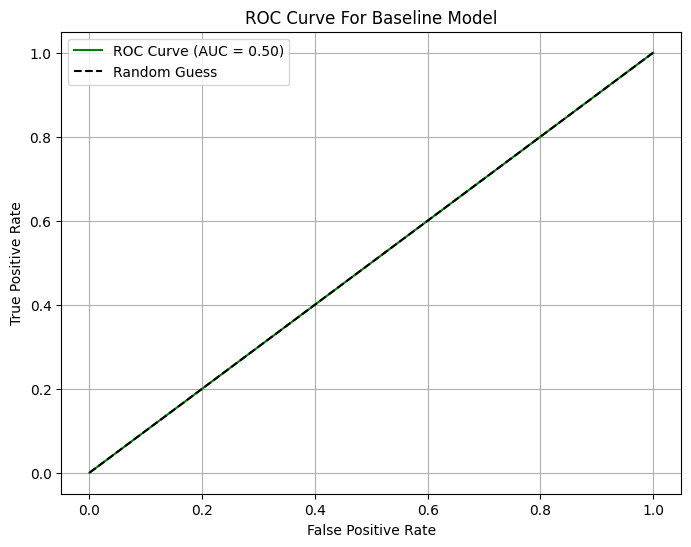

In [32]:
# Predict probabilities for the positive class on the resampled and scaled training set
# Roc AUC
y_prob = logreg.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
auc = roc_auc_score(y_train, y_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Baseline Model")
plt.legend()
plt.grid()
plt.show()

An AUC of 0.82 indicates strong model performance in distinguishing between classes despite the initial imbalance. The balanced precision, recall, and F1-scores (0.76 for both classes) confirm that using SMOTE effectively addressed the imbalance, enabling fair and consistent predictions across both classes.

In [33]:

cv_scores = cross_val_score(logreg, X_train_scaled, y_train_resampled, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()}")

Cross-Validation F1 Scores: [0.74292453 0.75233645 0.77136259 0.76725146 0.7672209 ]
Mean CV F1 Score: 0.7602191856212459


In [34]:
from sklearn.model_selection import cross_val_predict


# cross-validated predictions
y_pred_cv = cross_val_predict(logreg, X_train_scaled, y_train_resampled, cv=5)

# classification report
report = classification_report(y_train_resampled, y_pred_cv)

# classification report
print("Cross-Validated Classification Report:")
print(report)

Cross-Validated Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.76      0.76      2141
        True       0.76      0.76      0.76      2141

    accuracy                           0.76      4282
   macro avg       0.76      0.76      0.76      4282
weighted avg       0.76      0.76      0.76      4282



This shows the same results as model 2

In [35]:
# Instantiating the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

# Model evaluation
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      2141
        True       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



In [36]:
# Instantiating the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the training data
y_train_pred = dt.predict(X_train)

# Model evaluation
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 1.00
Confusion Matrix:
 [[2141    0]
 [   0  358]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      2141
        True       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



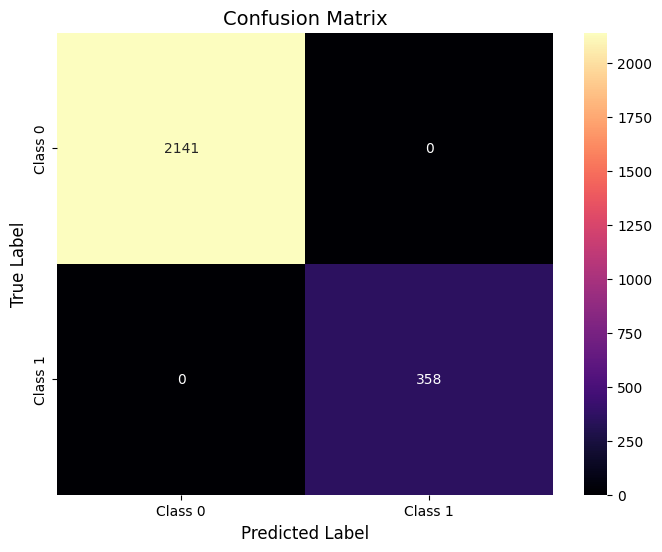

In [37]:
# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="magma", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

The model is overfitting. Perfect metrics like 100% accuracy, precision, recall, and F1-scores are a red flag, especially with a small dataset (2,499 samples) and class imbalance. The model likely memorized the data rather than learning general patterns. Testing on new data should reveal if it struggles to generalize.

In [38]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf2.fit(X_train, y_train)
y_train_pred = clf2.predict(X_train)


print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      2141
        True       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



In [39]:
clf = DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42, 
    max_depth=5,       
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced'
)
# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate on test data (unseen data)
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print evaluation metrics
print("\nConfusion Matrix on Test Data:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Cross-validation to evaluate model generalization
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")

Training Accuracy: 0.93
Test Accuracy: 0.92

Confusion Matrix on Test Data:
 [[672  37]
 [ 26  99]]

Classification Report on Test Data:
               precision    recall  f1-score   support

       False       0.96      0.95      0.96       709
        True       0.73      0.79      0.76       125

    accuracy                           0.92       834
   macro avg       0.85      0.87      0.86       834
weighted avg       0.93      0.92      0.93       834


Cross-Validation Accuracy: 0.93 (+/- 0.01)


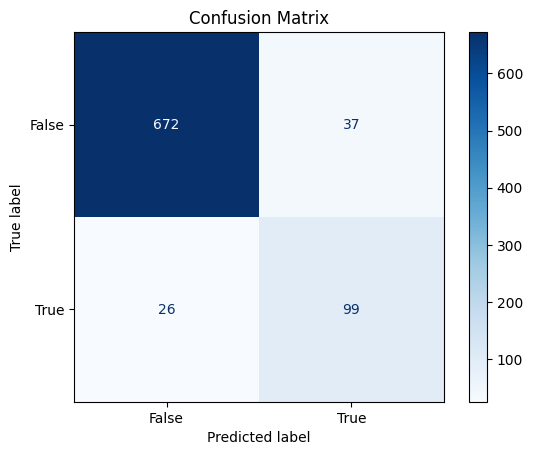

In [40]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

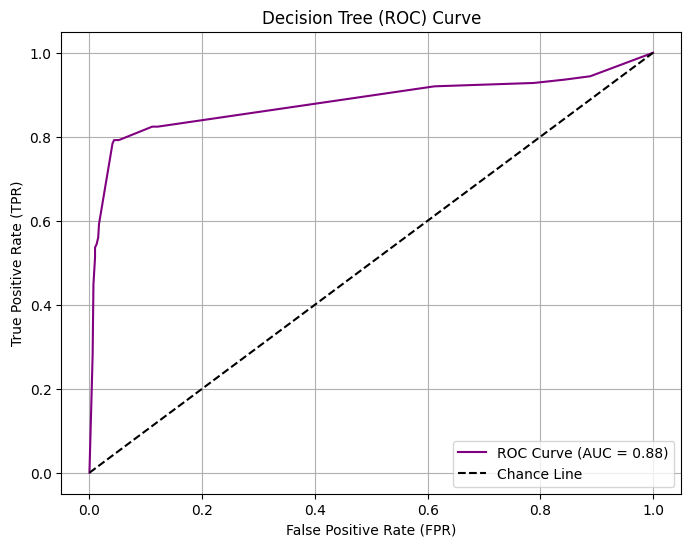

In [41]:
# AUC Plot
y_test_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
auc_score = roc_auc_score(y_test, y_test_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="purple") 
plt.plot([0, 1], [0, 1], linestyle='--', color="k", label="Chance Line") 
plt.title("Decision Tree (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

model has a 93% chance of correctly ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

The model performs well with high accuracy on both training (93%) and test data (92%), indicating good generalization.

Class 0 (majority class) is predicted with high precision (96%) and recall (95%), achieving a strong F1-score of 0.95.
Class 1 (minority class) has lower precision (72%) and recall (79%), with an F1-score of 0.76, reflecting some difficulty in predicting this class accurately.
The confusion matrix shows a small number of misclassifications: 38 false positives and 26 false negatives.

Cross-validation confirms stable performance (93% accuracy with low variance, ±1%).

Overall, the model is effective, but performance for the minority class (Class 1) could be improved.

In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest (Assign a name to the model)
rf_with_smote = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_with_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate on training and test data
y_train_pred = rf_with_smote.predict(X_train_resampled)
y_test_pred = rf_with_smote.predict(X_test)

# metrics
print(f"Training Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.00
Test Accuracy: 0.94

Confusion Matrix:
 [[553  13]
 [ 27  74]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.97       566
        True       0.85      0.73      0.79       101

    accuracy                           0.94       667
   macro avg       0.90      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667



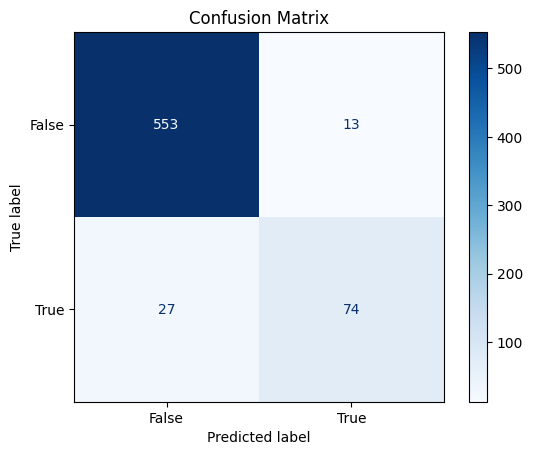

In [43]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_with_smote.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

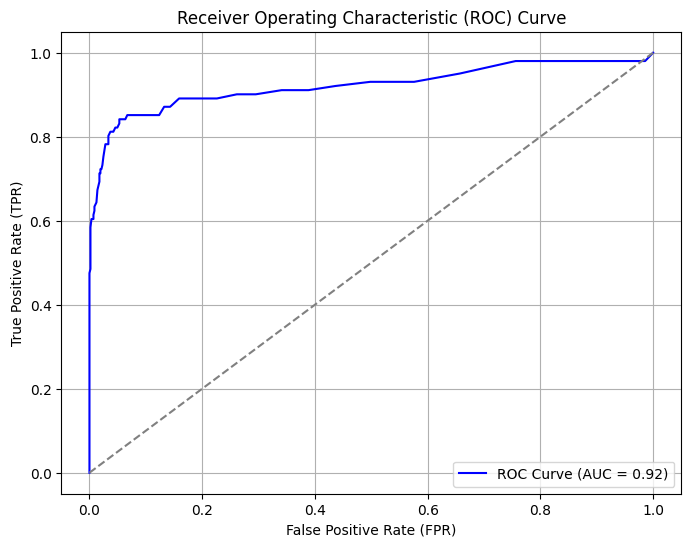

In [44]:
y_test_probs = rf_with_smote.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
auc_score = roc_auc_score(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

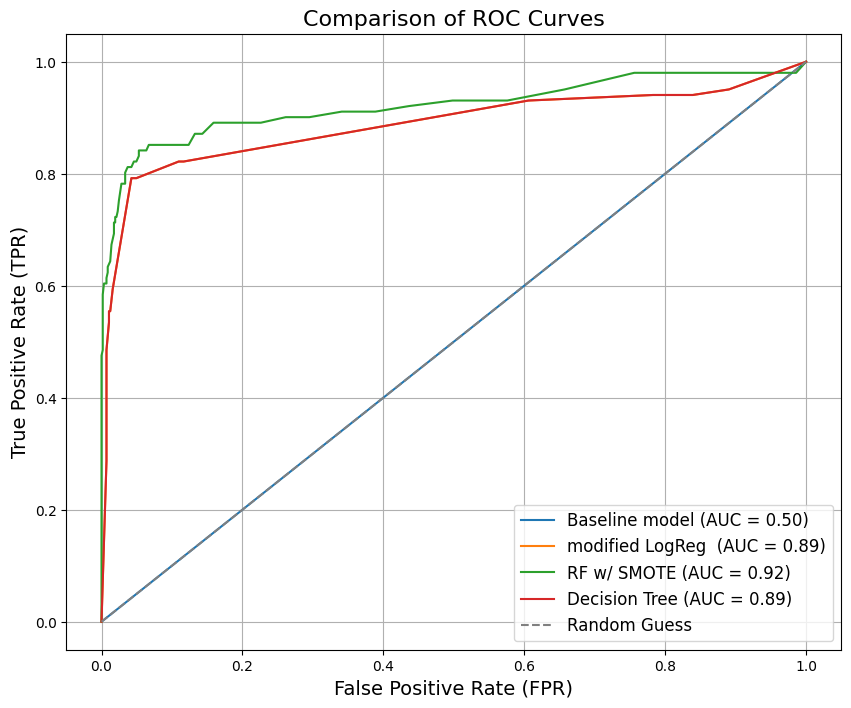

In [45]:
# Prepare data for plotting ROC curves
roc_data = []

# Model 1: Logistic Regression on Training Data
y_prob_train = logreg.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc_train = roc_auc_score(y_train, y_prob_train)
roc_data.append((fpr_train, tpr_train, auc_train, "Baseline model (AUC = {:.2f})".format(auc_train)))

# Model 2: Logistic Regression on Test Data
y_prob_test = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_test = roc_auc_score(y_test, y_prob_test)
roc_data.append((fpr_test, tpr_test, auc_test, "modified LogReg  (AUC = {:.2f})".format(auc_test)))

# Model 3: Random Forest with SMOTE on Test Data
y_prob_rf = rf_with_smote.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_data.append((fpr_rf, tpr_rf, auc_rf, "RF w/ SMOTE (AUC = {:.2f})".format(auc_rf)))

# Model 4: Decision Tree on Test Data
y_test_probs_dt = clf.predict_proba(X_test)[:, 1]  # Decision Tree predictions
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_probs_dt)
auc_dt = roc_auc_score(y_test, y_test_probs_dt)
roc_data.append((fpr_dt, tpr_dt, auc_dt, "Decision Tree (AUC = {:.2f})".format(auc_dt)))

# Plotting all ROC curves on the same plot
plt.figure(figsize=(10, 8))

for fpr, tpr, auc, label in roc_data:
    plt.plot(fpr, tpr, label=label)

# Add the random guess line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

# Customize the plot
plt.title("Comparison of ROC Curves", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid()
plt.show()


The Random Forest model (AUC = 0.92) is the best-performing model, offering excellent predictive power and handling complex data effectively. The Decision Tree (AUC = 0.89) performs slightly worse but is simpler and interpretable. The Modified Logistic Regression (AUC = 0.86) is a strong alternative, balancing performance and efficiency. The Baseline model (AUC = 0.50) highlights the significant improvement achieved by these models. For maximum accuracy, choose Random Forest; for simplicity, choose Logistic Regression.



### Recommendations and next step
- Focus on reducing churn by addressing frequent customer service calls (over four), as these strongly correlate with customer dissatisfaction.

- Promote voicemail and international plans to specific customer segments, as both show potential to improve retention.

- Develop targeted retention efforts in area code 415, leveraging its larger customer base and slightly higher churn rate.


Next steps:
- Tailor marketing strategies for voicemail and international plans to high-risk groups.
- Develop area-specific retention campaigns, focusing on high-churn segments.

### Conclusion

The Random Forest model (AUC = 0.92) is the best-performing model, offering excellent predictive power and handling complex data effectively. The Decision Tree (AUC = 0.89) performs slightly worse but is simpler and interpretable. The Modified Logistic Regression (AUC = 0.86) is a strong alternative, balancing performance and efficiency. The Baseline model (AUC = 0.50) highlights the significant improvement achieved by these models. For maximum accuracy, choose Random Forest; for simplicity, choose Logistic Regression.